# RAVEN Dataset Analysis

### Modules

In this section we can see all modules used in this work.

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, math


### Ploting function

In this section we can see the function responsible for plotting data.

In [2]:
def plot_decision_regions(X, y, yset, predictions, resolution = 0.02):
    plt.rcParams['figure.figsize'] = [ 20, 6 ]
    fig, axs = plt.subplots(1, 2)

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - resolution * 2, X[:, 0].max() + resolution * 2
    x2_min, x2_max = X[:, 1].min() - resolution * 2, X[:, 1].max() + resolution * 2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    for i in range(len(axs)):
        axs[i].set_xlim([ xx1.min(), xx1.max() ])
        axs[i].set_ylim([ xx2.min(), xx2.max() ])
        axs[i].set_xlabel('PC1')
        axs[i].set_ylabel('PC2')
        axs[i].grid()

    # plot class samples (real)
    for idx, cl in enumerate(np.unique(y)):
        axs[0].scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)
        
    # plot class samples (prediction)
    for idx, cl in enumerate(np.unique(y)):
        axs[1].scatter(x = X[predictions == cl, 0], y = X[predictions == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)
    
    for ax in axs:
        ax.legend([ yset[value] for value in np.unique(y) ], loc = 'lower left')
        
    axs[0].set_title('Real')
    axs[1].set_title('Predictions')

    plt.tight_layout()
    plt.show()


### Load gender information

In this section we read data from about gender information.

Aside from loading the gender information, we create two new columns based on the loaded information, they are the the ratios of correct answers for both the training and the testing set. We also remove the the columns with the right and the columns with the wrongs answers for each set.

In [3]:
# set columns and classes
gicolumns = [ 'Indiv', 'Gender' ]
classes = [ 'Feminino', 'Masculino' ]

# load and filter gender info
gender_info = pd.read_csv(os.path.join('RAVEN', 'data.csv'), header = None, engine = 'python')
gender_info = gender_info[gender_info[1].isin(classes)]

# calculate ratios of correct answers
gender_info['training'] = gender_info[2] / (gender_info[2] + gender_info[3])
gender_info['testing'] = gender_info[4] / (gender_info[4] + gender_info[5])

# rename and select gender and indiv columns
gender_info.rename(columns = dict(enumerate(gicolumns)), inplace = True)
gender_info = gender_info[gicolumns + [ 'training', 'testing' ]]

# show gender info
gender_info

Indiv     Gender  training   testing
0    DEI_01  Masculino  0.916667  0.750000
1    DEI_02   Feminino  0.916667  0.750000
2    DEI_03   Feminino  1.000000  0.888889
3    DEI_04  Masculino  1.000000  0.781250
4    DEI_05  Masculino  0.916667  0.722222
5    DEI_06  Masculino  0.833333  0.583333
6    DEI_07  Masculino  0.833333  0.722222
7    DEI_08   Feminino  1.000000  0.861111
8    DEI_09   Feminino  0.750000  0.472222
9    DEI_10  Masculino  0.750000  0.857143
10   DEI_11  Masculino  0.916667  0.694444
11   DEI_12  Masculino  0.833333  0.611111
12   DEI_13  Masculino  1.000000  0.805556
13   DEI_14  Masculino  1.000000  0.694444
14   DEI_15  Masculino  0.833333  0.500000
15   DEI_16  Masculino  0.666667  0.472222
16   DEI_17  Masculino  1.000000  0.750000
17   DEI_18  Masculino  0.916667  0.777778
18   DEI_19  Masculino  0.833333  0.750000
19   DEI_20   Feminino  0.750000  0.516129
20   DEI_21   Feminino  0.833333  0.555556
21   DEI_22   Feminino  0.666667  0.444444
22   DEI_23  Masculino  0.916667  0.444444
23   DEI_24  Masculino  0.750000  0.500000
24  ESEC_01  Masculino  0.916667  0.666667
25  ESEC_02   Feminino  0.916667  0.638889
26  ESEC_03   Feminino  0.416667  0.500000
27  ESEC_04  Masculino  0.833333  0.555556
28  ESEC_05   Feminino  0.666667  0.666667
29  ESEC_07  Masculino  1.000000  0.777778
30  ESEC_08  Masculino  0.750000  0.416667
31  ESEC_09  Masculino  0.916667  0.611111
32  ESEC_10   Feminino  0.666667  0.527778
33  ESEC_11   Feminino  0.666667  0.250000
34  ESEC_12  Masculino  0.833333  0.583333
35  ESEC_13  Masculino  0.833333  0.500000
36  ESEC_14  Masculino  0.666667  0.361111
37  ESEC_15   Feminino  0.833333  0.611111
38  ESEC_16  Masculino  0.916667  0.611111
39  ESEC_17  Masculino  0.833333  0.611111
40  ESEC_18   Feminino  0.750000  0.388889
41  ESEC_19   Feminino  0.666667  0.500000
42  ESEC_20   Feminino  1.000000  0.694444
43  ESEC_21  Masculino  0.916667  0.833333


### Load overall energy ratios data

In this section we load the overall energy ratios data, the immersion data, and the P100 and P300 data and merge that data with the gender data loaded in the previous section.

In [4]:
# load data with gnender info
overall = pd.read_excel(os.path.join('RAVEN', 'overall_energy_ratios.xlsx'))
overall_immersion = pd.read_excel(os.path.join('RAVEN', 'overall_immersion.xlsx'))
overall_immersion.columns = [ 'immersion_{}'.format('_'.join(column.split(' '))) for column in overall_immersion.columns ]
overall = pd.concat([ overall, overall_immersion ], axis = 1)
overall_P100 = pd.read_excel(os.path.join('RAVEN', 'Overall_P100.xlsx'))
overall = pd.merge(overall, overall_P100, on = 'Indiv')
overall_P300 = pd.read_excel(os.path.join('RAVEN', 'Overall_P300.xlsx'))
overall = pd.merge(overall, overall_P300, on = 'Indiv')
overall = pd.merge(overall, gender_info, on = 'Indiv')

# display overall
overall

Indiv  stress_display_training_F3  stress_display_testing_F3  \
0    DEI_01                     3.02540                    2.78310   
1    DEI_02                     3.46230                    2.44780   
2    DEI_03                     1.47420                    3.08240   
3    DEI_04                     1.92910                   26.94300   
4    DEI_05                     2.31850                    3.59930   
5    DEI_06                     0.00000                    0.00000   
6    DEI_07                     1.53630                    1.09460   
7    DEI_08                     6.51830                    4.64730   
8    DEI_09                     1.19610                    4.90680   
9    DEI_10                     0.82105                    2.55990   
10   DEI_11                    28.45400                    2.94440   
11   DEI_12                     3.43060                    0.75679   
12   DEI_13                     1.12320                    3.65850   
13   DEI_14                     0.95935                    0.17098   
14   DEI_15                     3.23920                    0.65908   
15   DEI_16                     3.76560                    5.14800   
16   DEI_17                     8.71410                    0.98065   
17   DEI_18                     2.31060                    4.99180   
18   DEI_19                     1.89480                    2.59350   
19   DEI_20                     6.17580                   11.08700   
20   DEI_21                     1.10570                    1.36000   
21   DEI_22                     1.01020                    1.09520   
22   DEI_23                     6.14540                    1.30910   
23   DEI_24                     2.50000                    0.38945   
24  ESEC_01                     9.53390                    0.62071   
25  ESEC_02                     3.16420                    1.23580   
26  ESEC_03                     0.92472                   12.14300   
27  ESEC_04                     0.91263                    0.83380   
28  ESEC_05                     6.39180                    0.38561   
29  ESEC_07                     5.35750                    0.30147   
30  ESEC_08                    10.78100                    1.13610   
31  ESEC_09                     2.79920                    0.88583   
32  ESEC_10                         NaN                        NaN   
33  ESEC_11                     4.61340                    0.97883   
34  ESEC_12                     0.96920                    2.86660   
35  ESEC_13                     1.56150                    3.11340   
36  ESEC_14                     4.80310                    1.42080   
37  ESEC_15                     2.93470                    1.81470   
38  ESEC_16                     6.27390                    3.42870   
39  ESEC_17                     2.28260                    4.15320   
40  ESEC_18                     0.87338                    2.94080   
41  ESEC_19                     8.05840                    2.51500   
42  ESEC_20                     4.94010                    2.16160   
43  ESEC_21                     6.02170                    2.89180   

    stress_display_training_F4  stress_display_testing_F4  \
0                      2.36390                    2.89210   
1                      3.08250                    2.77290   
2                      1.66950                    2.91540   
3                      4.76270                    5.72170   
4                      2.44960                    3.70510   
5                      0.00000                    0.00000   
6                      1.65270                    1.09820   
7                      7.97680                    4.69950   
8                      0.90476                    5.11480   
9                      0.80876                    2.50610   
10                     0.86042                    3.31550   
11                     3.00800                    0.72733   
12                     1.28650                    4.16260   
1


### Handling NaN values

In this section with handle NaN values. In order to accomplish this we replace every NaN value with te mean of the values of the given feature for the given class.

In [5]:
# fill NaN with the means of the respective class
for target in classes:
    keep = overall['Gender'] == target
    target_df = overall[keep]
    overall[keep] = target_df.fillna(target_df.mean())

# display overall
overall

Indiv  stress_display_training_F3  stress_display_testing_F3  \
0    DEI_01                    3.025400                   2.783100   
1    DEI_02                    3.462300                   2.447800   
2    DEI_03                    1.474200                   3.082400   
3    DEI_04                    1.929100                  26.943000   
4    DEI_05                    2.318500                   3.599300   
5    DEI_06                    0.000000                   0.000000   
6    DEI_07                    1.536300                   1.094600   
7    DEI_08                    6.518300                   4.647300   
8    DEI_09                    1.196100                   4.906800   
9    DEI_10                    0.821050                   2.559900   
10   DEI_11                   28.454000                   2.944400   
11   DEI_12                    3.430600                   0.756790   
12   DEI_13                    1.123200                   3.658500   
13   DEI_14                    0.959350                   0.170980   
14   DEI_15                    3.239200                   0.659080   
15   DEI_16                    3.765600                   5.148000   
16   DEI_17                    8.714100                   0.980650   
17   DEI_18                    2.310600                   4.991800   
18   DEI_19                    1.894800                   2.593500   
19   DEI_20                    6.175800                  11.087000   
20   DEI_21                    1.105700                   1.360000   
21   DEI_22                    1.010200                   1.095200   
22   DEI_23                    6.145400                   1.309100   
23   DEI_24                    2.500000                   0.389450   
24  ESEC_01                    9.533900                   0.620710   
25  ESEC_02                    3.164200                   1.235800   
26  ESEC_03                    0.924720                  12.143000   
27  ESEC_04                    0.912630                   0.833800   
28  ESEC_05                    6.391800                   0.385610   
29  ESEC_07                    5.357500                   0.301470   
30  ESEC_08                   10.781000                   1.136100   
31  ESEC_09                    2.799200                   0.885830   
32  ESEC_10                    3.522887                   3.520123   
33  ESEC_11                    4.613400                   0.978830   
34  ESEC_12                    0.969200                   2.866600   
35  ESEC_13                    1.561500                   3.113400   
36  ESEC_14                    4.803100                   1.420800   
37  ESEC_15                    2.934700                   1.814700   
38  ESEC_16                    6.273900                   3.428700   
39  ESEC_17                    2.282600                   4.153200   
40  ESEC_18                    0.873380                   2.940800   
41  ESEC_19                    8.058400                   2.515000   
42  ESEC_20                    4.940100                   2.161600   
43  ESEC_21                    6.021700                   2.891800   

    stress_display_training_F4  stress_display_testing_F4  \
0                      2.36390                    2.89210   
1                      3.08250                    2.77290   
2                      1.66950                    2.91540   
3                      4.76270                    5.72170   
4                      2.44960                    3.70510   
5                      0.00000                    0.00000   
6                      1.65270                    1.09820   
7                      7.97680                    4.69950   
8                      0.90476                    5.11480   
9                      0.80876                    2.50610   
10                     0.86042                    3.31550   
11                     3.00800                    0.72733   
12                     1.28650                    4.16260   
1


### Kernel PCA

In this section we apply the a Kernel PCA to the data in order to remove unused features. The number of components that we used was 28, this is because it was to this number of components that we obtained the best accuracy.

In [6]:
# select columns and rows
overall = overall[overall[[ feature for feature in overall.columns if feature not in gender_info.columns ]].sum(axis = 1) > 0]
columns = [ column for column in overall.columns if column not in gicolumns ]

# apply standard scalar to prepare data for the Kernel PCA
x = overall[columns].values
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)
x = pd.DataFrame(x, columns = columns)

# apply PCA
pca = KernelPCA(n_components = 28, kernel = 'rbf', gamma = 15, fit_inverse_transform = True)
x = pca.fit_transform(x)

# display features's values selected by the Kernel PCA algorithm
x

array([[ 0.00000000e+00,  0.00000000e+00,  7.24119281e-01,
        -0.00000000e+00, -4.08989057e-01, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  3.33251982e-01,
         4.06681315e-01,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.93353809e-02, -4.07469558e-02,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [-5.63957238e-02,  3.76534056e-02,  1.60335200e-01,
         8.26196236e-02,  6.12023960e-01,  2.81883977e-02,
         3.09800496e-02,  1.21490851e-02,  1.26951275e-01,
         2.01882969e-02, -7.86076791e-02,  1.53452170e-01,
         1.91509870e-01,  6.41089888e-02,  7.20055039e-02,
         1.08576916e-01, -2.47627934e-02,  6.32919223e-02,
        -6.13407200e-02, -1.49597439e-01,  2.34429722e-02,
        -5.91737819e-03,  5.90

### Normalization

Following the used of the Kernel PCA, we normalized the new dataset in order to obtain more accurate results. This task is accomplished in this section.

In [7]:
# normalization
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

# display normalized data
x

array([[0.42329032, 0.36459608, 1.        , 0.37239155, 0.06705422,
        0.48586973, 0.4173247 , 0.48210095, 0.26609022, 0.44570952,
        0.37709925, 1.        , 0.70158709, 0.35816563, 0.4363602 ,
        0.36430607, 0.42642349, 0.4942082 , 0.40812753, 0.42660491,
        0.46356483, 0.42007355, 0.3770858 , 0.48959149, 0.47879136,
        0.40404661, 0.39741894, 0.21337757],
       [0.37143074, 0.40257797, 0.48523804, 0.46340405, 1.        ,
        0.52225772, 0.44884244, 0.49350889, 0.40452041, 0.46719092,
        0.29970982, 0.72834378, 0.45899767, 0.41927777, 0.50914043,
        0.48400531, 0.39973639, 0.56450352, 0.34518973, 0.26728569,
        0.48937437, 0.39094882, 1.        , 0.57960995, 0.51518361,
        0.40305609, 0.45202079, 0.25762801],
       [0.31442274, 0.19981116, 0.59531908, 0.25150426, 0.76447159,
        0.33980197, 0.43014746, 0.35642455, 0.08355097, 0.52475827,
        0.47658421, 0.12785056, 0.25842002, 0.18730489, 0.35389925,
        0.25743581, 0.3851


### Use of Linear SVC Classifier and training and testing datasets

In the following section we create a linear svc classifier that will later be used to build a model that represents the data and is able to predict the classes of new data.

Aside from this we create a training and testing dataset with a the training dataset being around 80% of the original dataset and the testing dataset being around 20% of the original dataset.

In [8]:
# convert classes to numbers
y = overall['Gender'].values
yset = set(y)
yset = dict([ (value, i) for i, value in enumerate(yset) ])
y = [ yset[value] for value in y ]
length = x.shape[0]

In [9]:
# create classifier
linear_svc_classifier = LinearSVC(C = 1.0, max_iter = 100000, tol = 1e-05, verbose = 0)

In [10]:
# set training size dataset to 80%  and the testing size dataset to 20% of the original dataset
training_size = math.floor(length * 0.8)
testing_size = length - training_size

# randomly select the training dataset and the testing dataset
training_choice = list(np.random.choice(x.shape[0], training_size, replace = False))
testing_choice = [ i for i in range(x.shape[0]) if i not in training_choice ]

# set the training dataset
X_training = x[training_choice, :]
Y_training = [ y[value] for value in training_choice ]

# set the testing dataset
X_testing = x[testing_choice, :]
Y_testing = [ y[value] for value in testing_choice ]

In [11]:
# display training features
X_training

array([[0.47430959, 0.31337295, 0.2422135 , 0.33568765, 0.46686549,
        0.74361789, 0.46380351, 0.4985634 , 0.        , 0.46754053,
        0.35408025, 0.81491342, 0.20736575, 0.42119756, 0.18258327,
        1.        , 0.2964393 , 0.38851236, 0.39243389, 1.        ,
        0.48939915, 0.45826704, 0.43327279, 0.38407171, 0.55397792,
        0.33598769, 0.39672848, 0.21625444],
       [0.32547631, 0.3196029 , 0.33821367, 0.5443643 , 0.36378801,
        0.57360434, 0.39642351, 0.46130963, 0.25161287, 0.44812267,
        0.49266011, 0.34244748, 0.15714043, 0.29643745, 0.4718073 ,
        0.27780399, 0.24495091, 0.52240398, 0.32393626, 0.4487239 ,
        0.30646712, 0.42665508, 0.40474222, 0.69309006, 0.52147688,
        0.39651084, 0.13899584, 1.        ],
       [0.37143074, 0.40257797, 0.48523804, 0.46340405, 1.        ,
        0.52225772, 0.44884244, 0.49350889, 0.40452041, 0.46719092,
        0.29970982, 0.72834378, 0.45899767, 0.41927777, 0.50914043,
        0.48400531, 0.3997

In [12]:
# display training classes
Y_training

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0]

In [13]:
# display testing features
X_testing

array([[0.42401175, 0.32322791, 0.        , 0.42156145, 0.        ,
        0.31946706, 0.41171885, 0.48628584, 0.20364613, 0.43433492,
        0.26641694, 0.41017479, 0.50292862, 0.37207607, 0.4039644 ,
        0.32339104, 0.33693309, 0.59107738, 0.59613379, 0.44566991,
        0.4734249 , 0.11416227, 0.96620181, 0.36061786, 0.42852117,
        0.40407056, 0.3433543 , 0.20012107],
       [0.44720907, 0.49953927, 0.09158651, 0.45229764, 0.58986585,
        0.41669693, 0.61392509, 0.50457739, 0.25019732, 0.51319543,
        0.30306678, 0.24006531, 1.        , 0.28213451, 0.2205982 ,
        0.39413065, 0.49767176, 0.58117258, 0.41372752, 0.34787114,
        0.49234816, 0.38803821, 0.        , 0.46555486, 0.43645949,
        0.51356865, 0.34512956, 0.24905515],
       [0.        , 0.71337312, 0.31006398, 0.41859903, 0.4766402 ,
        0.41832058, 0.        , 1.        , 0.22372347, 0.45977413,
        0.36901062, 0.55590524, 0.21872246, 0.36043449, 0.43888788,
        0.33616139, 0.4282

In [14]:
# display testing classes
Y_testing

[0, 0, 0, 0, 1, 0, 1]


### Building model and making prediction on the testing dataset

In this section we build the model using the training dataset and the linear svc classifer. We also create a prediction of the testing dataset so that later we can calculate the accuracy of the model.

In [15]:
# feed the training dataset to the classifer
linear_svc_classifier.fit(X_training, Y_training)

# predict the classes for the testing dataset
linear_svc_Y_pred = linear_svc_classifier.predict(X_testing)

# display prediction
linear_svc_Y_pred

array([0, 0, 0, 0, 0, 0, 1])


### Calculating the accuracy of the model

After building the model and calculating a prediction for the testing dataset, we now calculate the accuracy of the results.

In [16]:
# calculate accuracy of predictions
accuracy = accuracy_score(Y_testing, linear_svc_Y_pred)

# display accuracy
accuracy

0.8571428571428571


### Plotting the results

Finally we plot the results where we can compare the predictions with the real results. Due to the huge number of features we plot only the using the first and second principal component obtained using the kernel PCA.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

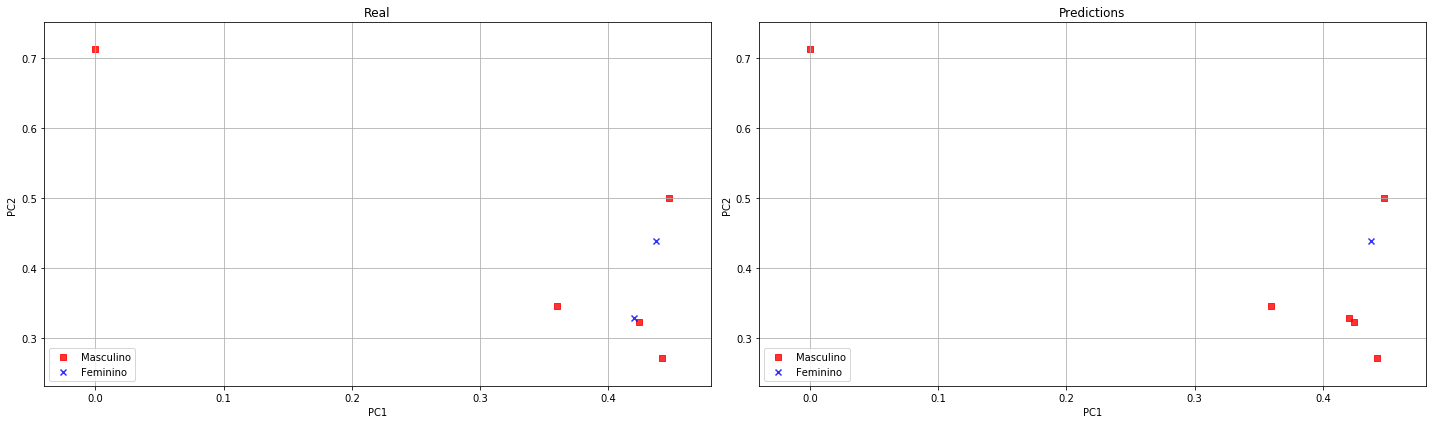

In [17]:
# plot results
plot_decision_regions(X_testing[:, :2], Y_testing, { v : k for k, v in yset.items() }, linear_svc_Y_pred)


### Tests

The main reason behind using the linear svc classifier with 28 principal components was due to a couple of tests done on multiple classifiers for various numbers of principal components that calculated an average accuracy for each one of this classifiers.

Each test follows the same logic used in this notebook for each of the classifiers. Each combination of classifier and number of principal components were tested 2000 times and made an average in the end of those 2000 tests.

In this section we show the results of this tests (the script responsible for this is the "test.py" script) and we can see that in fact a linear svc classifier with 28 principal components is the classifier with the best average accurcy (for the tested classifiers).

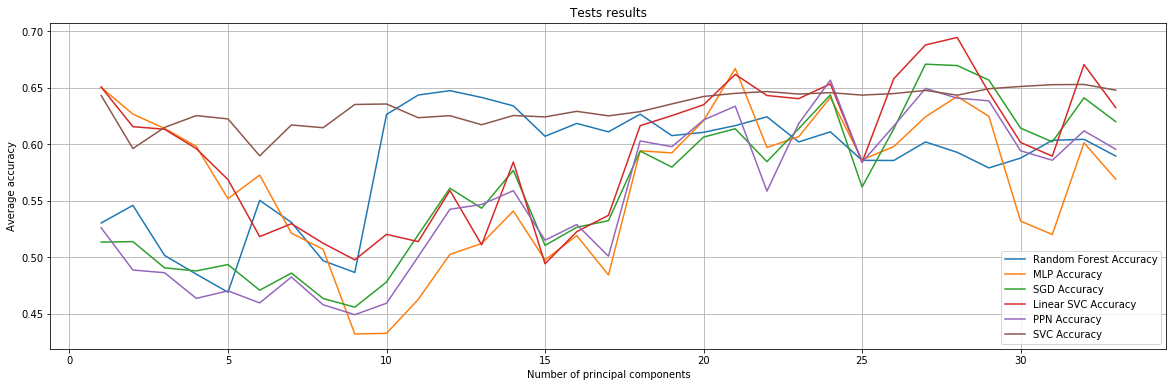

In [18]:
# load tests results
results = pd.read_excel('test-results.xlsx')

# plot tests results
for column in [ column for column in results.columns if column != 'top' ]:
    plt.plot(results['top'], results[column])    
plt.legend([ column for column in results.columns if column != 'top' ])
plt.xlabel('Number of principal components')
plt.ylabel('Average accuracy')
plt.title('Tests results')
plt.grid()
plt.show()